In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
# housing

In [8]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

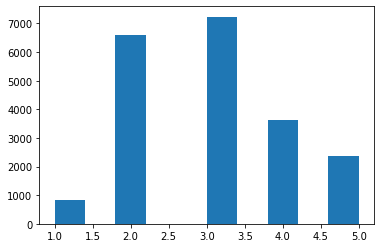

In [9]:
plt.hist(housing['income_cat'])

In [11]:
h1 = housing.groupby('income_cat', group_keys=False).apply(lambda x: x.sample(200))

(array([200.,   0., 200.,   0.,   0., 200.,   0., 200.,   0., 200.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

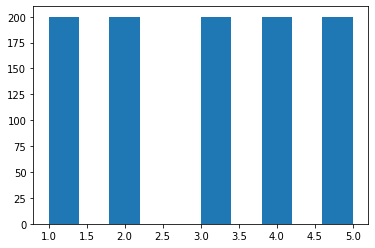

In [12]:
plt.hist(h1['income_cat'])

In [17]:
n=1000
h2 = housing.groupby('income_cat', group_keys=False).apply(lambda x: x.sample(int(np.rint(n*len(x)/len(housing))))).sample(frac=1)

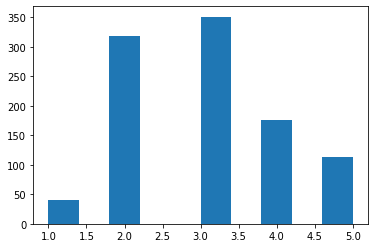

In [19]:
plt.hist(h2['income_cat']);

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

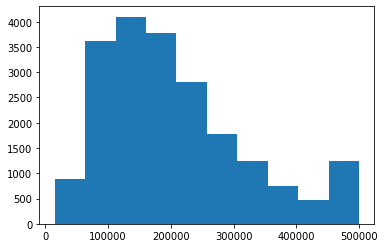

In [16]:
plt.hist(housing['median_house_value'])

(array([ 89., 176., 161., 134., 136.,  68.,  73.,  40.,  30.,  93.]),
 array([ 22500. ,  70250.1, 118000.2, 165750.3, 213500.4, 261250.5,
        309000.6, 356750.7, 404500.8, 452250.9, 500001. ]),
 <BarContainer object of 10 artists>)

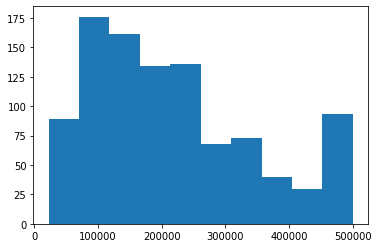

In [15]:
plt.hist(h1['median_house_value'])

(array([142., 166., 205., 142., 100.,  71.,  67.,  32.,  23.,  52.]),
 array([ 44600. ,  90140.1, 135680.2, 181220.3, 226760.4, 272300.5,
        317840.6, 363380.7, 408920.8, 454460.9, 500001. ]),
 <BarContainer object of 10 artists>)

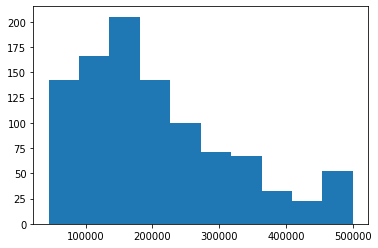

In [20]:
plt.hist(h2['median_house_value'])

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
h3 = strat_train_set.copy()

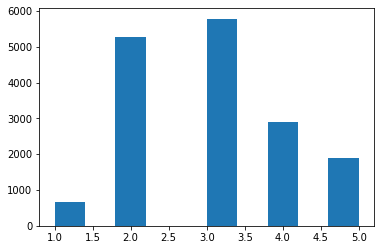

In [25]:
plt.hist(h3['income_cat']);

(array([ 707., 2915., 3273., 3017., 2221., 1408.,  992.,  593.,  390.,
         996.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <BarContainer object of 10 artists>)

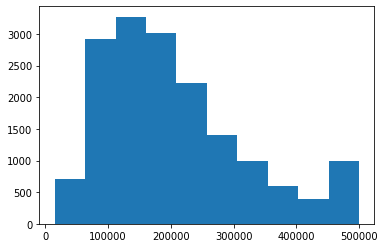

In [26]:
plt.hist(h3['median_house_value'])